In [44]:
import numpy as np
import matplotlib.pyplot as plt#後でプロットするためです。
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error#後でモデルの評価をするためです。

from sklearn.datasets import load_boston
boston = load_boston()
import pandas as pd
X=pd.DataFrame(boston.data[:,:], columns=boston.feature_names)
y=boston.target[:]

# 多項式と誤差関数

In [57]:
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()
import pandas as pd
X=pd.DataFrame(boston.data[:,:], columns=boston.feature_names)
y=boston.target[:]
x=X['LSTAT'].values

#### degree 1

In [58]:
from sklearn.linear_model import LinearRegression
lin_1d = LinearRegression()
lin_1d.fit(x[:,None],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### degree 2

In [59]:
from sklearn.preprocessing import PolynomialFeatures
degree_2=PolynomialFeatures(degree=2)
x_2=degree_2.fit_transform(x[:,None])

In [60]:
lin_2d = LinearRegression()
lin_2d.fit(x_2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### degree 3

In [61]:
degree_3=PolynomialFeatures(degree=3)
x_3=degree_3.fit_transform(x[:,None])

In [62]:
lin_3d = LinearRegression()
lin_3d.fit(x_3,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### degree 5

In [63]:
degree_5=PolynomialFeatures(degree=5)
x_5=degree_5.fit_transform(x[:,None])

In [64]:
lin_5d = LinearRegression()
lin_5d.fit(x_5,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### 誤差関数

In [65]:
from sklearn.metrics import mean_squared_error
#まずは1次関数の2乗和誤差をみてみましょう
mean_squared_error(y,lin_1d.predict(x[:,None]))

38.48296722989415

In [66]:
#次には２次関数の2乗和誤差をみてみましょう
mean_squared_error(y,lin_2d.predict(x_2))

30.330520075853713

In [67]:
mean_squared_error(y,lin_3d.predict(x_3))

28.884350319213166

In [68]:
mean_squared_error(y,lin_5d.predict(x_5))

26.87161072621587

# 単回帰

In [4]:
lin_1d = LinearRegression()

# 説明変数に前回と同じLSTATを使ってみましょう。今回は前回とは違う風にnumpyにデータを変換していれてみましょう。
x = X.loc[:, ['LSTAT']].as_matrix()
# このままでもscikit learnのモデルを使うことができます。
lin_1d.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
mean_squared_error(y,lin_1d.predict(x))

15.537906007479375

# 重回帰

In [6]:
lin_1d_2 = LinearRegression()

# 説明変数に前回と同じLSTATを使ってみましょう。今回は前回とは違う風にnumpyにデータを変換していれてみましょう。
x2 = X.loc[:, ['LSTAT','CRIM']].as_matrix()
# このままでもscikit learnのモデルを使うことができます。
lin_1d_2.fit(x2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
print(lin_1d_2.coef_) # >>array([-0.64572128 -3.37090061])
# 切片
print(lin_1d_2.intercept_) # >>30.2202695941

[-0.64572128 -3.37090061]
30.2202695941


In [10]:
mean_squared_error(y,lin_1d_2.predict(x2))
# 先ほどの特徴量がひとつのときよりも誤差の値が小さくなっています。
# これは特徴量をひとつ追加したため、より予測の精度が上ったのだと考えることができます。

14.36106479948935

# データセット分割

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
lin_1d_2 = LinearRegression()
x2 = X_train.loc[:, ['LSTAT','CRIM']].as_matrix()
lin_1d_2.fit(x2, Y_train)

#汎化能力を見るため、テストデータを使って最小誤差を計算します。
x2_test = X_test.loc[:, ['LSTAT','CRIM']].as_matrix()
mean_squared_error(Y_test,lin_1d_2.predict(x2_test))

17.945205520307844

# 過学習

In [75]:
from sklearn.datasets import load_boston
boston = load_boston()
import pandas as pd
%matplotlib inline
X=pd.DataFrame(boston.data[:100,:], columns=boston.feature_names)
y=boston.target[:100]
x=X['LSTAT'].values

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

y_plot=[]
dim=[1,3,5,10,20]

for i in dim:
    degree_=PolynomialFeatures(degree=i)
    x_=degree_.fit_transform(x[:,None])
    lin_ = LinearRegression(normalize=True)
    #normalize=Trueは入力データを正規化してトレーニングすることを意味します。    
    lin_.fit(x_,y)
    #グラフのプロット用のデータをリストに格納しておきます
    n = np.linspace(np.min(x),np.max(x), 1000)
    y_=lin_.predict(degree_.fit_transform(n[:,np.newaxis]))
    y_plot.append(y_)

[]

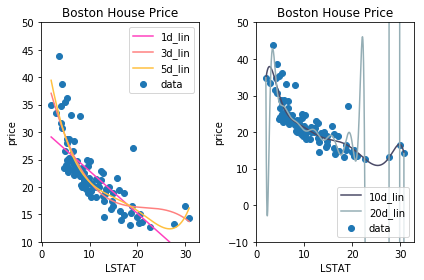

In [72]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

j=1
plt.subplot(1,2,1)
for i,y__ in zip(dim[:3],y_plot[:3]):
    c = cm.spring(float(j) / 4)
    plt.plot(n,y__,color=c,label=str(i)+'d_lin')
    j+=1  
plt.ylim(10,50)
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.title("Boston House Price")
plt.scatter(x,y,label='data')
plt.legend()

j=1
plt.subplot(1,2,2)
for i,y__ in zip(dim[3:],y_plot[3:]):
    c = cm.bone(float(j) / 3)
    plt.plot(n,y__,color=c,label=str(i)+'d_lin')
    j+=1  
plt.ylim(-10,50)
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.title("Boston House Price")
plt.scatter(x,y,label='data')

plt.tight_layout()
plt.legend()
plt.plot()

# 正則化

In [77]:
degree1_ = PolynomialFeatures()
x_= degree1_.fit_transform(x[:,None])
lin1d_ = LinearRegression(normalize=True)
lin1d_.fit(x_,y)
print(lin1d_.coef_)

[ 0.         -2.06400124  0.04503031]


In [79]:
#先ほどの例えば20乗のべきのモデルで各係数がどのような値をとっているのか確認してみましょう。
degree_ = PolynomialFeatures(degree=20)
x_= degree_.fit_transform(x[:,None])
lin_ = LinearRegression(normalize=True)
lin_.fit(x_,y)
print(lin_.coef_)

[  0.00000000e+00  -7.21244918e+04   6.58476317e+04  -3.48635513e+04
   1.19234364e+04  -2.75597732e+03   4.30811988e+02  -4.21897176e+01
   1.55577654e+00   2.32731374e-01  -4.77585876e-02   4.54127190e-03
  -2.69906274e-04   9.84436108e-06  -1.42400099e-07  -6.01769510e-09
   4.43759129e-10  -1.37640084e-11   2.46652193e-13  -2.48693820e-15
   1.10004856e-17]


##### そこで正則化

In [81]:
from sklearn.linear_model import Ridge
y_plot=[]
dim=[1,3,5,10,20]

for i in dim:
    degree_=PolynomialFeatures(degree=i)
    x_=degree_.fit_transform(x[:,None])
    lin_ = Ridge(normalize=True,alpha=0.0001)
    #normalize=Trueは入力データを正規化してトレーニングすることを意味します。
    lin_.fit(x_,y)
    #グラフのプロット用のデータをリストに格納しておきます
    n = np.linspace(np.min(x),np.max(x), 1000)
    y_=lin_.predict(degree_.fit_transform(n[:,np.newaxis]))
    y_plot.append(y_)

[]

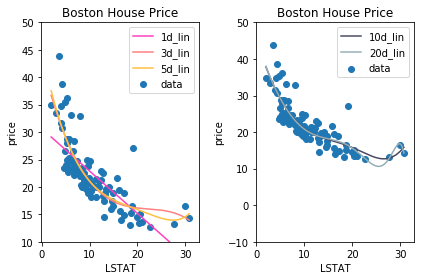

In [82]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

j=1
plt.subplot(1,2,1)
for i,y__ in zip(dim[:3],y_plot[:3]):
    c = cm.spring(float(j) / 4)
    plt.plot(n,y__,color=c,label=str(i)+'d_lin')
    j+=1  
plt.ylim(10,50)
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.title("Boston House Price")
plt.scatter(x,y,label='data')
plt.legend()

j=1
plt.subplot(1,2,2)
for i,y__ in zip(dim[3:],y_plot[3:]):
    c = cm.bone(float(j) / 3)
    plt.plot(n,y__,color=c,label=str(i)+'d_lin')
    j+=1  
plt.ylim(-10,50)
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.title("Boston House Price")
plt.scatter(x,y,label='data')

plt.tight_layout()
plt.legend()
plt.plot()

In [85]:
degree_=PolynomialFeatures(degree=20)
x_=degree_.fit_transform(x[:,None])
lin_ = Ridge(normalize=True,alpha=0.0001)
lin_.fit(x_,y)
print(lin_.coef_)

[  0.00000000e+00  -4.00033949e+00   1.49942374e-01   1.60674387e-03
  -6.67032149e-05  -2.93360124e-06  -6.17985155e-08  -5.49693879e-10
   1.91193729e-11   1.32234097e-12   5.15440135e-14   1.61901329e-15
   4.38489227e-17   1.01688037e-18   1.82671867e-20   1.22308376e-22
  -9.73178287e-24  -6.80611887e-25  -3.07369281e-26  -1.16361215e-27
  -3.92765562e-29]


In [1]:
l = []

In [5]:
if len(l) == 0:
    print("Yes")
else:
    print("No")


Yes


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.Series([0.25,0.5,0.75,1.0])
data

In [ ]:
data.values

In [ ]:
data.index

In [ ]:
data[1]

In [ ]:
data[1:3]

In [ ]:
data = pd.Series([0.25,0.5,0.75,1.0],index = ['a','b','c','d'])
data

In [ ]:
data['d']

#Datafrmae Object

In [ ]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import webbrowser

website='http://en.wikipedia.org/wiki/NFL_win-loss_records'
webbrowser.open(website)


In [ ]:
#クリップボードからデータを読み込む
nfl_frame = pd.read_clipboard()
nfl_frame.head()

In [ ]:
DataFrame(nfl_frame,columns=['Team','Season','Games'])

In [ ]:
DataFrame(nfl_frame,columns=['Team','Season','Games']).head()

In [ ]:
nfl_frame.columns

In [ ]:
nfl_frame.class?

In [ ]:
nfl_frame['Season'].head()

In [ ]:
DataFrame(nfl_frame,columns=['Team','Season','Games']).values

In [ ]:
data = Series([[[1,2,3,4],[5,6,7,8]]],index=['A','B'])
data

In [ ]:
data.head()

In [ ]:
d
ata.index

In [ ]:
data.values

In [ ]:
data1 = Series(np.arange(3),index=['a','b','c'])

In [ ]:
data1

In [ ]:
data1.drop('b')

In [ ]:
dframe1 = DataFrame(np.arange(9).reshape((3,3)),index=['SF','LA', 'NY'], columns=['size','population', 'year'])

In [ ]:
dframe1

In [ ]:
dframe1.drop('LA')

In [ ]:
dframe1.drop('year',axis=1)

In [ ]:
dframe = DataFrame(np.arange(25).reshape((5,5)),index=['NYC','LA','SF','DC','Chi'],columns=['A','B','C','D','E'])

In [ ]:
dframe

In [ ]:
dframe[dframe>9]

In [ ]:
dframe[['A','B']]

In [ ]:
dframe[0:1]

In [ ]:
dframe.loc["NYC"]

In [ ]:
dframe[dframe['E'].isin(['4'])]

In [ ]:
#クリップボードからデータを読み込む
df = pd.read_clipboard()
df.head()

In [ ]:
df.head()

In [ ]:
type(df.loc[:,"Enclosure"])

In [ ]:
df.query("Enclosure == 'BC001P'").count()

In [ ]:
array = df.Enclosure.unique()
type(array)

In [ ]:
lists = array.tolist()
print(lists)

In [ ]:
count_array = []
ttl = 0
for list in lists:
    print(list)
    count = df.query('Enclosure == \'' + list + '\'').count()
    ttl = count + ttl
    print(count)
print("_"*40)
print(ttl)

In [ ]:
a = pd.Series(['a', 'b', 'x'])
ilist = pd.Series(['a', 'b'])
print(ilist)

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
import pandas as pd
%matplotlib inline
X=pd.DataFrame(boston.data[:100,:], columns=boston.feature_names)
y=boston.target[:100]
x=X['LSTAT'].values

In [ ]:
type(y)

In [ ]:
type(boston.target[:1])

In [ ]:
type(X['LSTAT'])

In [ ]:
x=X['LSTAT'].values

In [ ]:
x